In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
csv_path= os.path.join("datasets","housing", "housing.csv")
housing=pd.read_csv(csv_path)

In [35]:


housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
housing.info() #info about the data we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='ocean_proximity'>

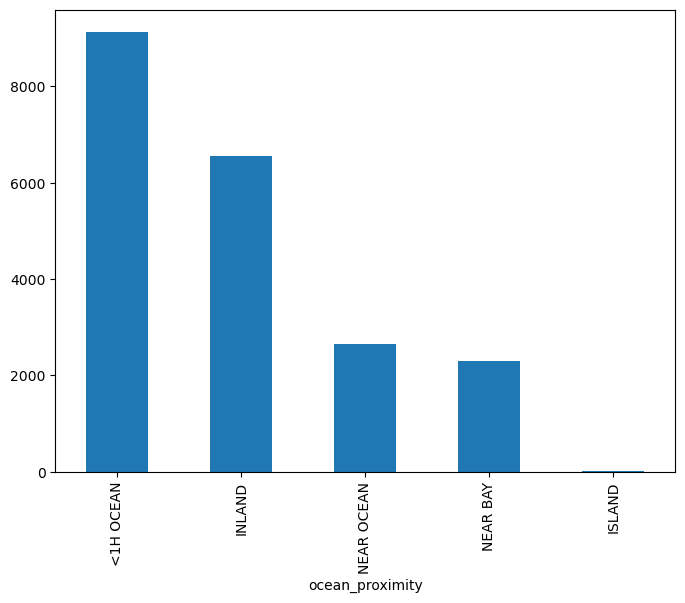

In [37]:
housing["ocean_proximity"].value_counts().plot(kind="bar",figsize=(8,6))

#here we can see that the most houses are near the ocean

In [38]:
#Now we will do some statiscal analysis of the data

housing.describe()

#here  we can see that the median income is 3.87(in 10000$) that is 38700$ which mean most of the people are middle class

# std tells us how much variation there is in the data,




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

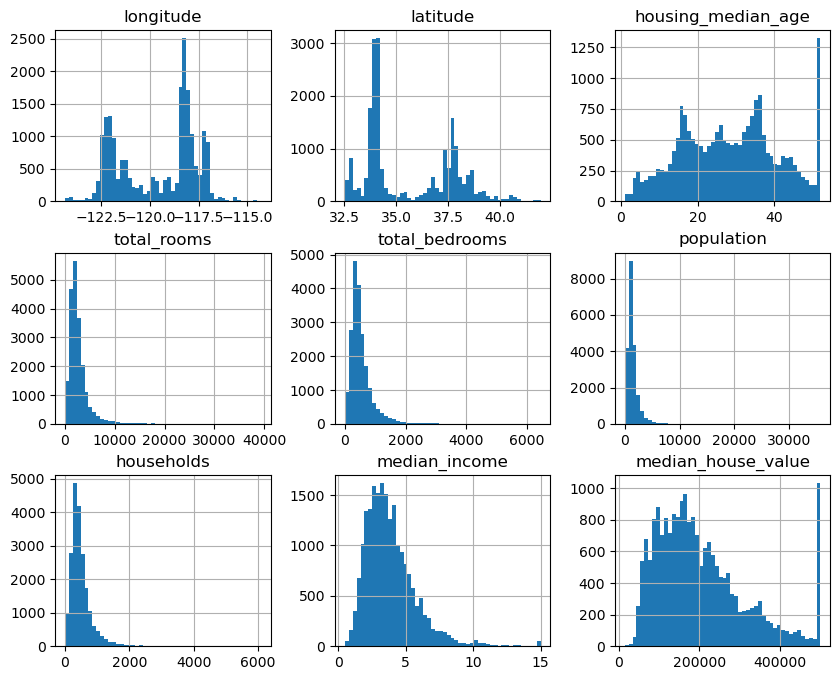

In [39]:
housing.hist(bins=50, figsize=(10,8))

<Axes: >

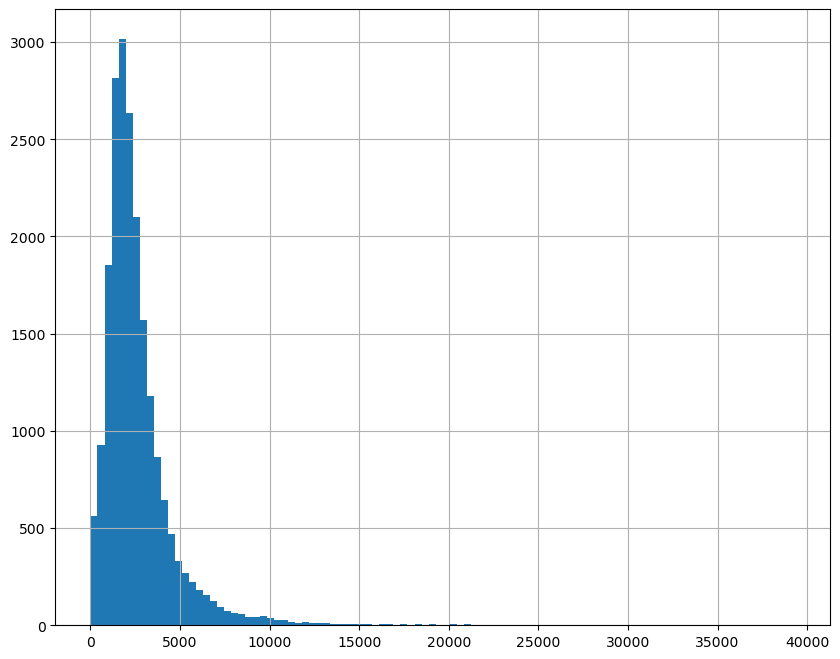

In [40]:
housing["total_rooms"].hist(bins=100, figsize=(10,8))
#x_axis is the number of the rooms and y_axis is the number of houses having those many rooms
#which shows that most of the houses have around 2000 rooms

In [41]:
# let's break our data into test  and train set

#First lets do it randomly 

def split_train_test(data,test_ratio):
    shuffled_indices= np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices= shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]

    return housing.iloc[test_indices] ,housing.iloc[train_indices]


test_set, train_set = split_train_test(housing,0.2)



In [42]:
train_set.head(5)
len(train_set)

16512

In [43]:
len(test_set)

4128

here above we split the data set ...randomly ,,,but we  use random approach , When ever we run the program it will always 
give us the random Train, test sets....So one option is to use the (np.random.seed(42))

but it will always give the unstalbe train,test data sets ,,,,when ever we upate it .

So ,one of the mature approach is to use a IDENTIFIER . we will always be sure that those IDENTIFIER which follow the split rule will always be in the TRAIN SET and same with THE TEST SET...BECAUSE every entity(which is a row here) has a unique IDENTIFIER.



2ND 

we will split the data on the basis of the particular IDENTIFIER


HERE we import first the data compression libarary (uses algoritms like DEFLATE)

Same we import the CRC32 which is not it self a data compression algoritm ,,but it is a checksum function that ensures the data intergrity
..ensuring that every unique identifier will have the UNIQUE HASH VALUE...OF 32 bit

In [44]:
from zlib import crc32

def test_set_check(indentifier,test_ratio):

    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32




def split_train_test_by_ID(data,test_ratio,id_column):
    ids=data[id_column]

    in_test_set= ids.apply(lambda id_:test_set_check(id_,test_ratio) )

    return data.loc[~in_test_set] , data.loc[in_test_set]




Suppose our identifier is STRING ,,,so we have to convert it into the RAW BYTES ..AS CRC32 works on RAW BYTES

def test_set_check(identifier.test_ratio):
   
   #for string identifier

   if isinstance(identifier,str):
      identifier_encode = identifier.encode('uft-8')

      hash_value=crc32(identifier)&0xffffffff 

   esle:
    
    hash_value=crc32(np.int64(identifier)) & 0xffffffff

  return hash_value < test_ratio *2**32


AS we have not an index in our data set ,,, we can get a defalut index BY .reset_index()


In [45]:
housing_with_ID=housing.reset_index()



Here we pass our index containing dataset to the function ,which will split our data on the bases of the INDENTIFIER which index here

..also we can create our own user defined indixes ,, '

like LOCATION FACTORS like (longitude and latitude),for a particular INSTENCE

In [46]:
train_set ,test_set =split_train_test_by_ID(housing_with_ID,0.2,"index")

In [47]:
train_set.head(10)
len(train_set)

16512

3rd 
WE can also use the SKLEARN's provided functionalities of spliting the data

In [48]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)


train_set.head(10)
len(train_set)

16512

TILL NOW WE DO RANDOM SAMPLING ,,WHICH IS QUIT GOOD ID YOUR DATA SET IS LARGE ENOUGH ...(ESPECIALLY RELATIVE TO THE NUMNER OF ATTRIBUTES )

BUT IF IT IS NOT ,BY DOING THIS RANDOM SAMPLING ,WE CAN INTRODUCE THE CONFLICT OF SAMPLING BAIS ..

WE HAVE TO MENTAIN THE RATIO OF THE DATA ,WHILE SPLITING/SAMPLING ---- THIS IS KNOWN AS STRATIFIED SAMPLING.

the data attributeS /data is divided into the homogenous subgroups KNOWM AS STRATA..AND THE RIGHT NUMBER OF INSTANCES ARE SAMPLED FROM EACH STRATUM TO ENSURE THAT THE TEST SET IS REPRESENTATIVE OF THE OVERALL DATA.





Same here ,median income is an important attribute for predicting the median house price..so we have to ensure that OUR TEST is representative of various categories of income in the whole dataset...

AS our median income attribute is numerical, we have to genrate the possible and effective STRATUM.


In [49]:
housing['income_cat'] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3., 4.5, 6. , np.inf],
                                labels=[1,2,3,4,5])

housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

so here we have to mentain the ratio of each strata in test set...


<Axes: >

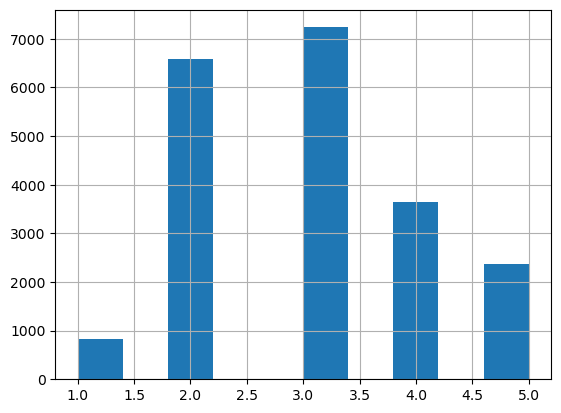

In [50]:
housing["income_cat"].hist()

Now we are ready to do the stratified sampling


In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index ,test_index in split.split(housing, housing['income_cat']):

    strat_train_set= housing.loc[train_index]

    strat_test_set= housing.loc[test_index]


    

In [52]:
strat_test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
7057,-118.04,33.93,35.0,1805.0,387.0,1505.0,366.0,4.1667,151900.0,<1H OCEAN,3
33,-122.27,37.83,49.0,1655.0,366.0,754.0,329.0,1.3750,104900.0,NEAR BAY,1
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,500001.0,NEAR OCEAN,5
18164,-122.03,37.36,16.0,2697.0,803.0,1369.0,723.0,4.4699,367400.0,<1H OCEAN,3
10444,-117.61,33.43,24.0,2303.0,399.0,851.0,379.0,3.9875,346500.0,NEAR OCEAN,3


In [53]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [54]:
housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

As we see that the test set genrated using the STRATIFIED SAMPLING has income category proportion almost identical as the ratio of it in the overall datatset

Now lets get rid of the income cat attributes ,,,as we done what we have to

In [55]:
for att in (strat_test_set,strat_train_set):
    att.drop('income_cat',axis=1, inplace=True)

NOW LETS BE WITH OUR TRAIN DATA SET ,AND NAME IT AS HOUSING

In [56]:
housing=strat_train_set.copy()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,165700.0,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,412300.0,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,349600.0,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,181300.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

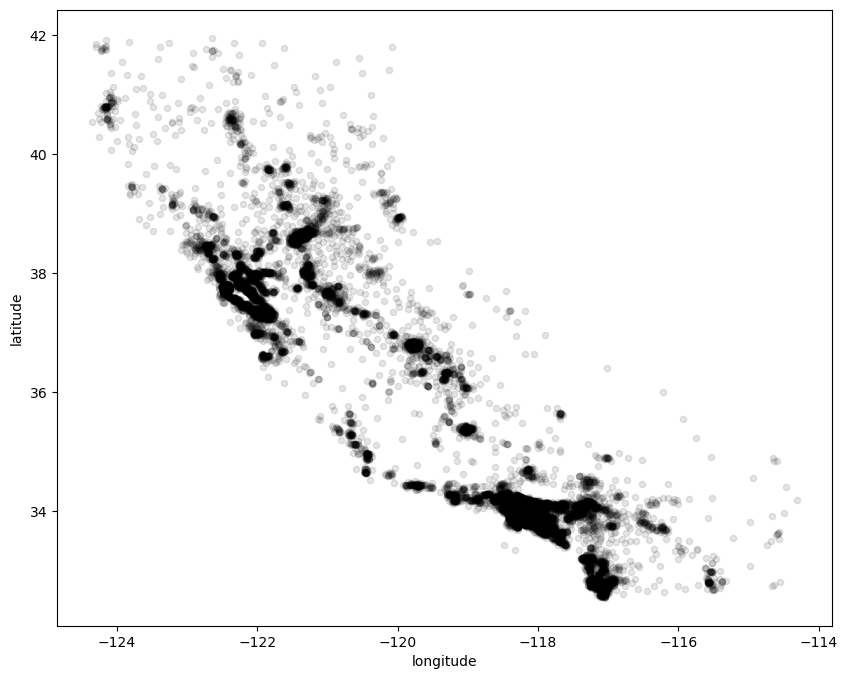

In [57]:
housing.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,8),alpha=0.1,color='black')

#here we got the high density area's location...

lets explor it in another way

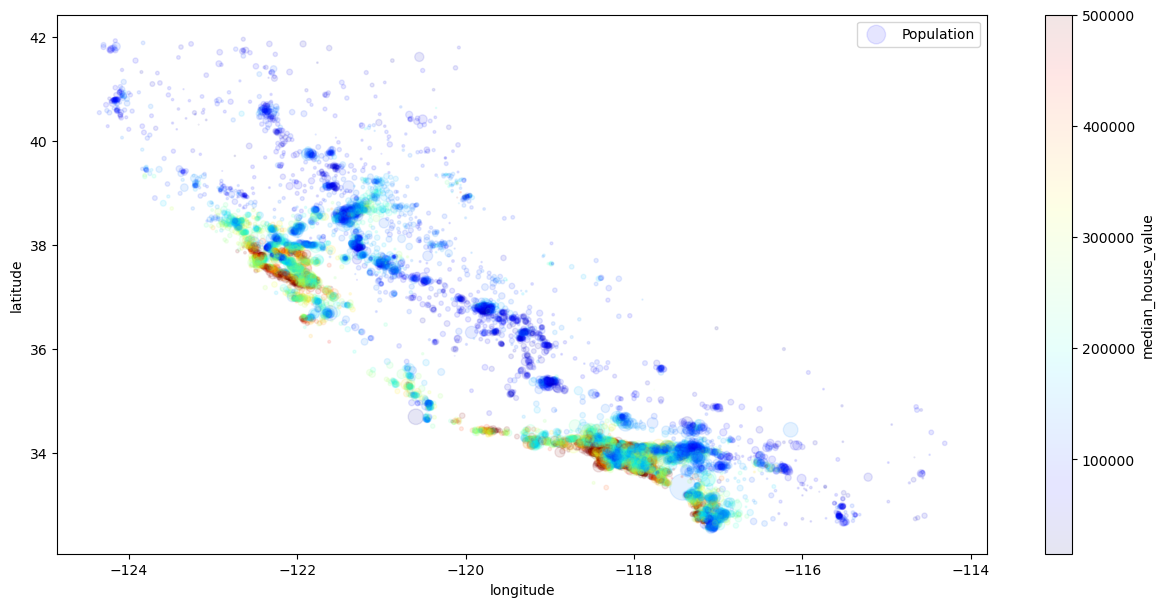

In [58]:
housing.plot(kind="scatter", x='longitude', y='latitude',alpha=0.1,
             s=housing["population"]/100,label='Population', figsize=(15,7),
             c="median_house_value",cmap=plt.get_cmap('jet'),colorbar=True)

plt.legend()

Now Lets see the Correlation between the numrecial attributes of our data set..ASIT MEASURES THE STRINGTH AND THE DIRECTION
For that we will make a change to our housing_data
 

In [59]:
numric_housing= housing.drop('ocean_proximity',axis=1)
numric_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [60]:
numric_housing_corr= numric_housing.corr()

numric_housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

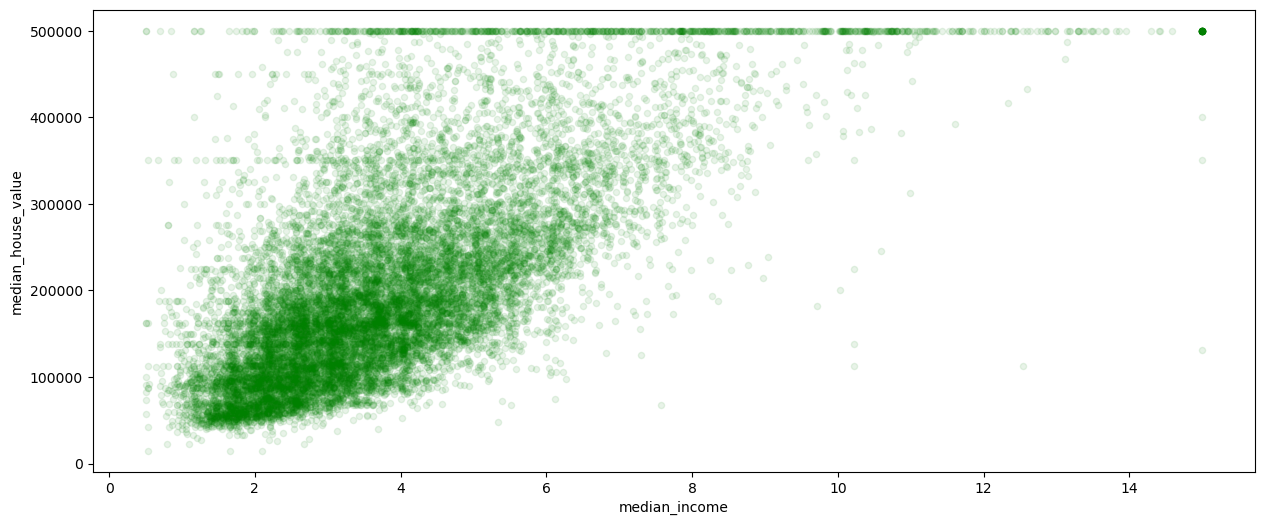

In [61]:
housing.plot(kind="scatter",x='median_income',y='median_house_value',alpha=0.09,figsize=(15,6),c="green")